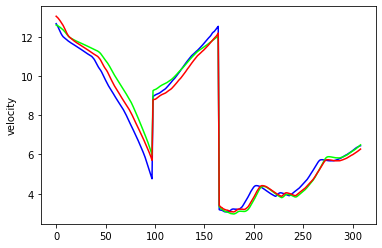

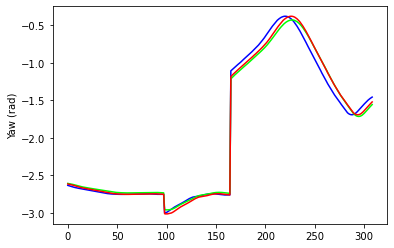

In [50]:
color_gt = (0,0,1)
color_pre = (0,1,0)
color_last = (1,0,0)

vel_gt = np.array(vel_gt, dtype=np.float32)
vel_pre = np.array(vel_pre, dtype=np.float32)
vel_last_seen = np.array(vel_last_seen, dtype=np.float32)
plt.plot(vel_gt,color = color_gt )
plt.plot(vel_pre,color = color_pre )
plt.plot(vel_last_seen,color = color_last )
plt.ylabel('velocity')
plt.show()



yaw_gt = np.array(yaw_gt, dtype=np.float32)
yaw_pre = np.array(yaw_pre, dtype=np.float32)
yaw_last_seen = np.array(yaw_last_seen, dtype=np.float32)
plt.plot(yaw_gt,color = color_gt )
plt.plot(yaw_pre,color = color_pre )
plt.plot(yaw_last_seen,color = color_last )
plt.ylabel('Yaw (rad)')
plt.show()

In [3]:
import numpy as np

def weight_smooth(sequence):
    new_sequence = []
    start = 0
    end = len(sequence)-1
    new_sequence.append(float(sequence[start][0]))

    for i,n in enumerate(sequence):
        if i > start+1 and i < end:
            
            pre_predecessor = sequence[i-2][0]
            predecessor = sequence[i-1][0]
            current = sequence [i][0]
            

            result = float(pre_predecessor)*0.3 + float(predecessor)*0.4 + float(current)*0.3 

            new_sequence.append(result)

    
    new_sequence.append(float(sequence[end][0]))



    return new_sequence


def weight_smooth_degree(sequence):
    new_sequence = []
    start = 0
    end = len(sequence)-1
  
    new_sequence.append(float(sequence[start]))

    for i,n in enumerate(sequence):
        if i > start+1 and i < end:
            
            pre_predecessor = sequence[i-2]
            predecessor = sequence[i-1]
            current = sequence [i]
            

            result = float(pre_predecessor)*0.3 + float(predecessor)*0.4 + float(current)*0.3 

            new_sequence.append(result)

    
    new_sequence.append(float(sequence[end]))



    return new_sequence
    

In [4]:
import json
import math

f = open('data_odometry.json')
data = json.load(f)

velocity_forward = []
acceleration_forward = []
pitch = []
wz = []
yaw = []
roll = []

for i in data:
    
    velocity_forward.append(data[i]['data']['vf'])
    velocity_smooth = weight_smooth(velocity_forward)

    acceleration_forward.append(data[i]['data']['af'])
    acceleration_smooth = weight_smooth(acceleration_forward)

    pitch_degree = float(data[i]['data']['pitch'][0])*float((180/3.14))
    pitch.append(pitch_degree)
    pitch_smooth = weight_smooth_degree(pitch)

    yaw_degree = float(data[i]['data']['yaw'][0])*float((180/3.14))
    yaw.append(yaw_degree)
    yaw_smooth = weight_smooth_degree(yaw)


    roll_degree = float(data[i]['data']['roll'][0])*float((180/3.14))
    roll.append(roll_degree)
    roll_smooth = weight_smooth_degree(roll)



    wz_degree = float(data[i]['data']['wz'][0])*float((180/3.14))
    wz.append(wz_degree)
    wz_smooth = weight_smooth_degree(wz)
















f.close()

In [5]:
print(velocity_smooth)
print(velocity_forward)

[13.172716663769, 13.129265188371601, 13.085398180764901, 13.0406742835971, 12.9939257465448, 12.940079547860499, 12.8777347852946, 12.8075513652369, 12.7352566699292, 12.6583261682331, 12.5738190268468, 12.4774154330747, 12.3740776646931, 12.265532080479801, 12.1631022208975, 12.0744002526251, 12.0069775625702, 11.9551371380917, 11.9134277275878, 11.8732708709809, 11.8313860380022, 11.790007269555801, 11.7511100093697, 11.7156743219084, 11.6825735966747, 11.652262105227901, 11.6209620486312, 11.587306332968, 11.5534950836846, 11.5215292485213, 11.4897267725266, 11.4570415135577, 11.4230837899734, 11.3896516928615, 11.3568659856693, 11.3245214183909, 11.290544310777001, 11.2558647160721, 11.2213942058346, 11.1867484738412, 11.1526667549455, 11.119884745084498, 11.0884170587373, 11.058446773434198, 11.0277042765608, 10.9892974732268, 10.9388084270745, 10.8751791297327, 10.796620863221701, 10.7058815264561, 10.6111210561831, 10.5194964953772, 10.4346547197115, 10.3572721057919, 10.280942

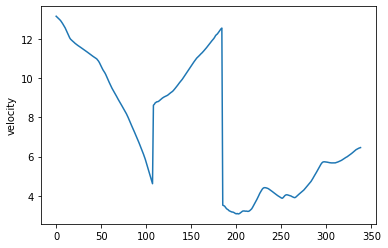

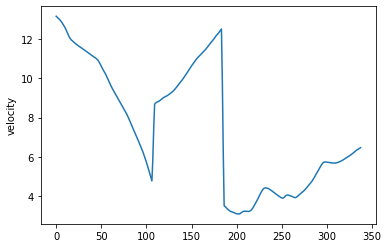

In [6]:
import matplotlib.pyplot as plt
import numpy as np

vf = np.array(velocity_forward, dtype=np.float32)
plt.plot(vf)
plt.ylabel('velocity')
plt.show()

vfm = np.array(velocity_smooth, dtype=np.float32)
plt.plot(vfm)
plt.ylabel('velocity')
plt.show()

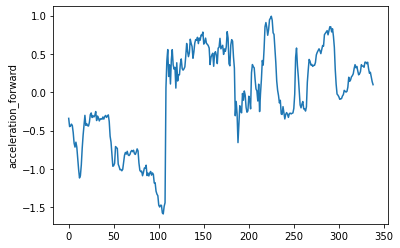

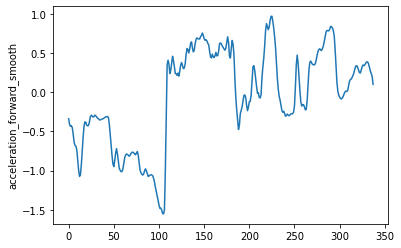

In [7]:
import matplotlib.pyplot as plt
import numpy as np

af = np.array(acceleration_forward, dtype=np.float32)
plt.plot(af)
plt.ylabel('acceleration_forward')
plt.show()

afm = np.array(acceleration_smooth, dtype=np.float32)
plt.plot(afm)
plt.ylabel('acceleration_forward_smooth')
plt.show()

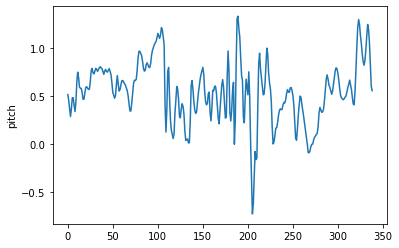

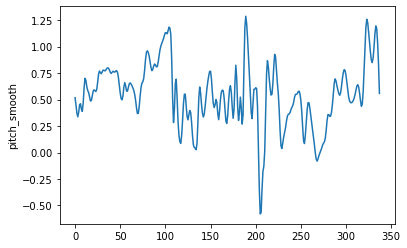

In [8]:
import matplotlib.pyplot as plt
import numpy as np

p = np.array(pitch, dtype=np.float32)
plt.plot(p)
plt.ylabel('pitch')
plt.show()


import matplotlib.pyplot as plt
import numpy as np

ps = np.array(pitch_smooth, dtype=np.float32)
plt.plot(ps)
plt.ylabel('pitch_smooth')
plt.show()

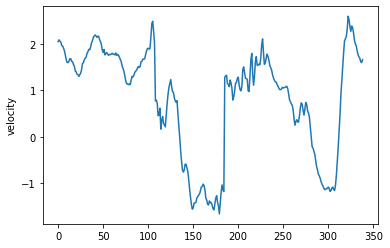

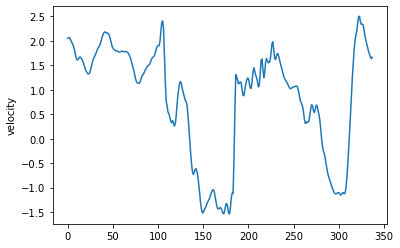

In [9]:
import matplotlib.pyplot as plt
import numpy as np

r = np.array(roll, dtype=np.float32)
plt.plot(r)
plt.ylabel('velocity')
plt.show()


import matplotlib.pyplot as plt
import numpy as np

rs = np.array(roll_smooth, dtype=np.float32)
plt.plot(rs)
plt.ylabel('velocity')
plt.show()

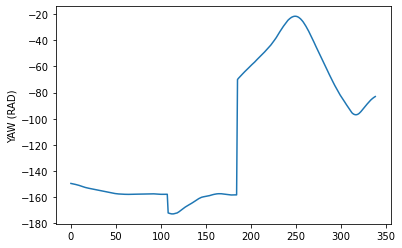

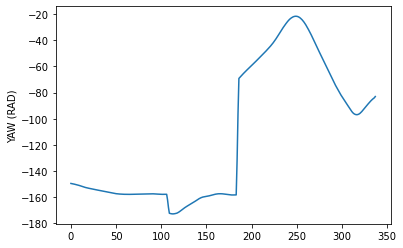

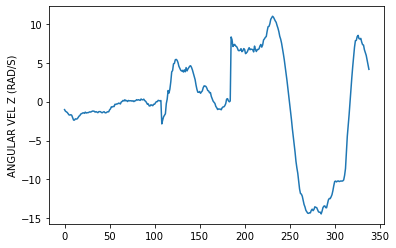

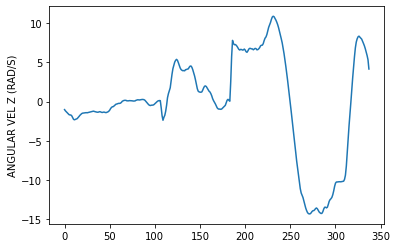

In [10]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(yaw, dtype=np.float32)
plt.plot(y)
plt.ylabel('YAW (RAD)')
plt.show()


ys = np.array(yaw_smooth, dtype=np.float32)
plt.plot(ys)
plt.ylabel('YAW (RAD)')
plt.show()



w = np.array(wz, dtype=np.float32)
plt.plot(w)
plt.ylabel('ANGULAR VEL Z (RAD/S)')
plt.show()

ws = np.array(wz_smooth, dtype=np.float32)
plt.plot(ws)
plt.ylabel('ANGULAR VEL Z (RAD/S)')
plt.show()

In [ ]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss